In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

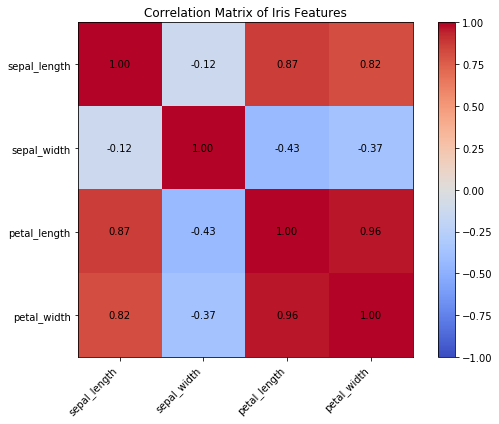

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

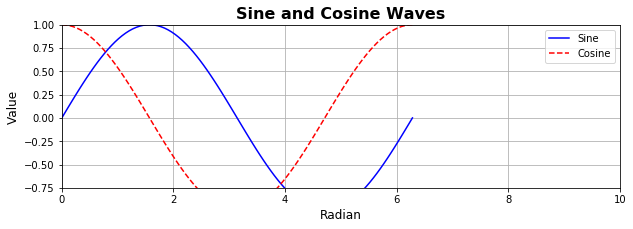

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Figure와 Axes 객체 생성 (figsize를 통해 크기 지정)
fig, ax = plt.subplots(figsize=(10, 3))

# ylim, xlim을 통해 표기할 범위 지정 가능
plt.ylim(-0.75, 1)       # y축 0~1 값으로 표시
plt.xlim(0,10)         # x축 0~10 값으로 표시

# 그래프 그리기 (label 인자 지정)
ax.plot(x, y1, label='Sine', color='blue')
ax.plot(x, y2, label='Cosine', color='red', linestyle='--')
# Pandas DataFrame의 경우, 자체적으로 plot 메소드를 통해 그릴 수도 있음

# 제목과 축 레이블 설정
ax.set_title('Sine and Cosine Waves', fontsize=16, fontweight='bold')
ax.set_xlabel('Radian', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
# fontsize, fontweight, color, linestyle 등 파라미터를 통해 제어 가능

# 범례 표시 (loc='best'는 최적의 위치에 자동으로 배치)
# .plot에 label 값이 입력되어 있어야 범례 표시가 이루어짐
ax.legend(loc='upper right', fontsize=10)

# 그리드 추가
ax.grid(True)

plt.show()

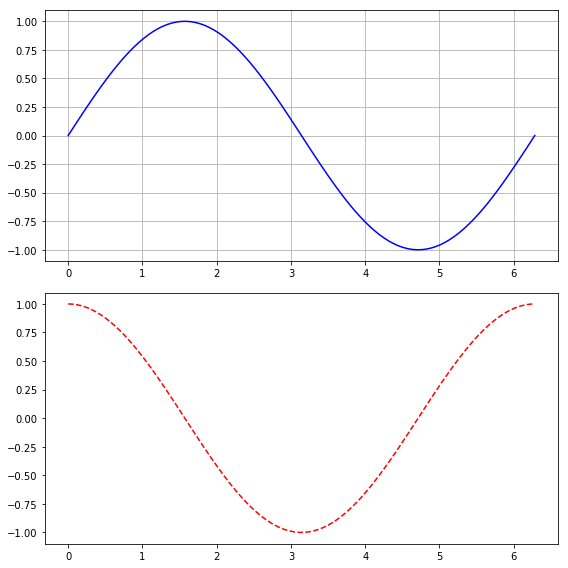

In [8]:
# 3행 1열로 그리기 (아래로 3개 나열)
plt.figure(figsize = (8,8))            # 각각의 그래프 크기 지정

# 첫번째 그래프
plt.subplot(2,1,1)
plt.plot(x, y1, label='Sine', color='blue')
plt.grid()

# 두번째 그래프
plt.subplot(2,1,2)
plt.plot(x, y2, label='Cosine', color='red', linestyle='--')

plt.tight_layout()                     # 그래프간 간격을 적절히 맞추기
plt.show()

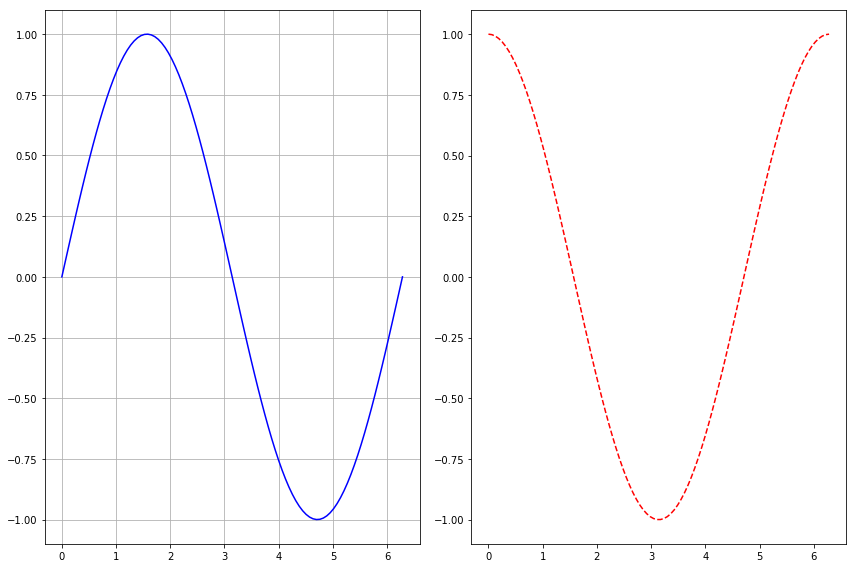

In [11]:
# 3행 1열로 그리기 (아래로 3개 나열)
plt.figure(figsize = (12,8))            # 각각의 그래프 크기 지정

# 첫번째 그래프
plt.subplot(1,2,1)
plt.plot(x, y1, label='Sine', color='blue')
plt.grid()

# 두번째 그래프
plt.subplot(1,2,2)
plt.plot(x, y2, label='Cosine', color='red', linestyle='--')

plt.tight_layout()                     # 그래프간 간격을 적절히 맞추기
plt.show()

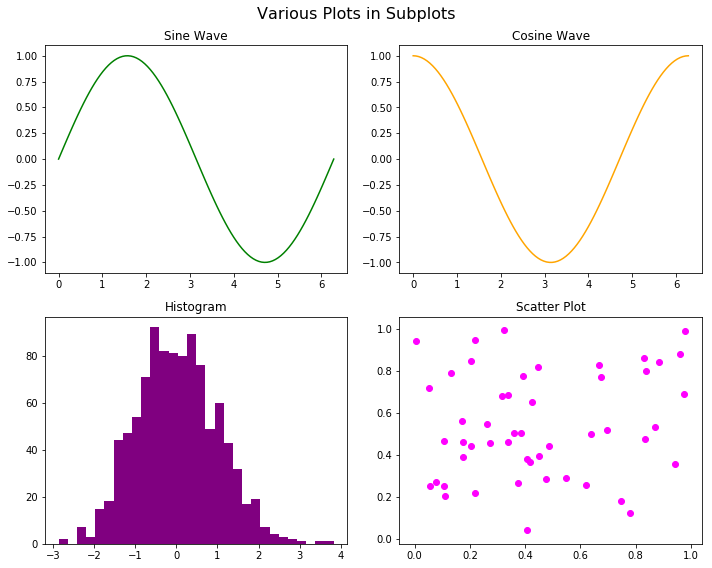

In [7]:
# 2x2 형태의 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# 전체 제목 설정
fig.suptitle('Various Plots in Subplots', fontsize=16)

# 첫 번째 서브플롯 (0, 0)
axes[0, 0].plot(x, y1, color='green')
axes[0, 0].set_title('Sine Wave')

# 두 번째 서브플롯 (0, 1)
axes[0, 1].plot(x, y2, color='orange')
axes[0, 1].set_title('Cosine Wave')

# 세 번째 서브플롯 (1, 0) - 히스토그램
data = np.random.randn(1000)
axes[1, 0].hist(data, bins=30, color='purple')
axes[1, 0].set_title('Histogram')

# 네 번째 서브플롯 (1, 1) - 산점도
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)
axes[1, 1].scatter(x_scatter, y_scatter, color='magenta')
axes[1, 1].set_title('Scatter Plot')

# 레이아웃 자동 조정
plt.tight_layout(rect=[0, 0, 1, 0.96]) # suptitle과 겹치지 않도록 조정

plt.show()

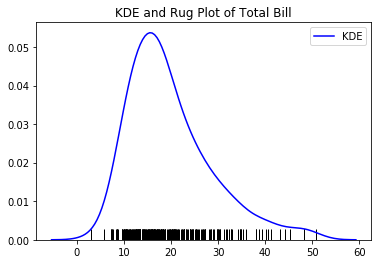

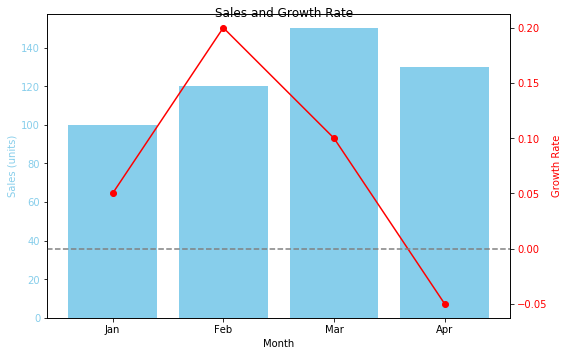

In [15]:
import seaborn as sns
tips = sns.load_dataset('tips')

# 1. 동일한 Axes에 겹쳐 그리기 (KDE + Rug plot)
fig, ax = plt.subplots()
# seaborn 0.9.0에서는 data 직접 전달로 구현하려면 x, y 값 전부 지정되어야 오류가 발생하지 않음
# sns.kdeplot(data=tips, x="total_bill", ax=ax, color='blue', label='KDE')
# sns.rugplot(data=tips, x="total_bill", ax=ax, color='black', label='Rug')
sns.kdeplot(tips["total_bill"], ax=ax, color='blue', label='KDE')  # 밀도 함수 작성
sns.rugplot(tips["total_bill"], ax=ax, color='black')              # 분포를 파악하기 위한 러그 플롯
ax.legend()
ax.set_title('KDE and Rug Plot of Total Bill')
plt.show()

# 2. 보조 Y축 사용하기 (twinx)
fig, ax1 = plt.subplots(figsize=(8, 5))

# 첫 번째 Y축 (ax1) - 바 차트
sales_data = {'month': ['Jan', 'Feb', 'Mar', 'Apr'], 'sales': [100, 120, 150, 130]}
ax1.bar(sales_data['month'], sales_data['sales'], color='skyblue', label='Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales (units)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 두 번째 Y축 (ax2) - 라인 플롯
ax2 = ax1.twinx()
growth_data = {'growth': [0.05, 0.2, 0.1, -0.05]}
ax2.plot(sales_data['month'], growth_data['growth'], color='red', marker='o', label='Growth Rate')
ax2.set_ylabel('Growth Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(0, color='gray', linestyle='--') # 성장률 0 기준선

fig.suptitle('Sales and Growth Rate')
fig.tight_layout()
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn에 내장된 'tips' 데이터셋 사용
tips = sns.load_dataset('tips')

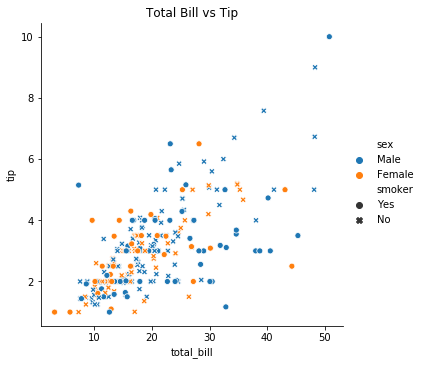

TypeError: distplot() got an unexpected keyword argument 'data'

In [18]:
# 관계형 플롯 (relplot): 산점도와 선 그래프
# 성별(sex)에 따라 색상을, 흡연여부(smoker)에 따라 마커 스타일을 다르게 표시
sns.relplot(x="total_bill", y="tip", hue="sex", style="smoker", data=tips)
plt.title('Total Bill vs Tip')
plt.show()

# 분포 플롯 (displot): 히스토그램, KDE, ECDF 등
# 요일(day)별로 다른 그래프를 그리고, 성별(sex)에 따라 색상을 다르게 표시
sns.distplot(data=tips, x="total_bill", hue="sex", col="day", kind="kde", col_wrap=2)
plt.show()

# 범주형 플롯 (catplot): 박스 플롯, 바이올린 플롯, 스트립 플롯 등
# 요일(day)에 따른 팁(tip)의 분포를 박스 플롯으로 시각화
sns.catplot(x="day", y="tip", kind="box", data=tips)
plt.title('Tip Distribution by Day')
plt.show()